# Scraping Twitter with Twint

Twitter's [official API](https://developer.twitter.com/en/docs) is powerful is some ways, but fairly restrictive in the volume and pace of data collection. While social scientists are often interested in data from months or years ago, Twitter's [Standard Search API](https://developer.twitter.com/en/docs/tweets/search/overview) only goes back seven days. The cost of [purchasing historical Twitter data](https://developer.twitter.com/en/docs/tutorials/choosing-historical-api) is often out of reach of the average social scientist and even aquiring an API key has become increasingly difficult.

However, all of public Twitter is still available through its standard web interface. The Python library [twint](https://github.com/twintproject/twint) takes advantage of this so you can collect data from Twitter without using the API. While it's pretty powerful, one major limitation is that while it gives the count of times something has been liked or retweeted, it does not return who liked or retweeted it.

In this notebook, I walk through the basics of twint.

## Installation

I used a two-step process to install twint. First, I used conda to install the required packages that were available through the conda-forge. In my experience, conda packages always work, but the same isn't true for pip. In this specific case, I couldn't get one of the twint dependencies (cchardet) to build through pip, so I had to use conda. 

Before installation, it is helpful to make sure you have the most up-to-date version of conda. Unfortunately, one of the consequences of conda's careful package management is that it can be slow.

In [202]:
%conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /Users/nealcaren/anaconda3

  added / updated specs:
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cffi-1.14.0                |   py36hb5b8e2f_0         218 KB
    cloudpickle-1.3.0          |             py_0          29 KB
    cython-0.29.15             |   py36h0a44026_0         2.1 MB
    intel-openmp-2020.0        |              166         1.1 MB
    json5-0.9.1                |             py_0          26 KB
    parso-0.6.1                |             py_0          69 KB
    pyodbc-4.0.30              |   py36h0a44026_0          66 KB
    setuptools-45.2.0          |           py36_0         655 KB
    sphinx-2.4.0               |             py_0         1.4 MB
    sphinxcontrib-websupport-1.2.0|             py_0          35 KB
    tornado-6.0.3              |   py36h1de35cc_3         643 KB


In [203]:
%conda install -c conda-forge aiohttp  pysocks geopy googletrans cchardet nest-asyncio

Solving environment: - 
  - anaconda/osx-64::ca-certificates-2019.8.28-0, anaconda/osx-64::openssl-1.1.1d-h1de35cc_2
  - anaconda/osx-64::openssl-1.1.1d-h1de35cc_2, defaults/osx-64::ca-certificates-2019.8.28-0
  - anaconda/osx-64::ca-certificates-2019.8.28-0, defaults/osx-64::openssl-1.1.1d-h1de35cc_2
  - defaults/osx-64::ca-certificates-2019.8.28-0, defaults/osx-64::openssl-1.1.1d-h1de35ccdone

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


The second step is to `%pip` install twint. 

In [155]:
%pip install twint

Note: you may need to restart the kernel to use updated packages.


The `%conda` and `%pip` commands only need to be run once.

## Basic search usage

In addition to the `twint` library, `nest_asyncio` needs to be imported when `twint` is employed in a notebook. `nest_asyncio` is used once to enable concurrent actions within a Jupyter notebook. 

In [1]:
import twint
import nest_asyncio

nest_asyncio.apply()

Before searching, you need to configure the search parameters. A straightforward search might ask for the twenty most recent mentions of #blacklivesmatter. 

In [2]:
c = twint.Config()

c.Search = '#blacklivesmatter'
c.Limit = 20

The configuration parameters are passed to the `Search' function.

In [3]:
twint.run.Search(c)

1231975589361274881 2020-02-24 11:14:04 EST <PuterGeek7> The best picture #Bernie2020 #BernieSanders #BernieSanders2020 #Bernie #BernieBeatsTrump #DemocraticSocialism #Progressive #Progressives #BlackLivesMatter @Latinos4Bernie @BerniePride @LGBT4Bernie @LGBTforBernie @BlacksForBernie @LostDiva #Road2Bernie https://twitter.com/breandad512/status/1231839419654688770 …
1231975472621346817 2020-02-24 11:13:36 EST <titi_babydoll> #MLK #BlackHistoryMonth2020 #illkneel #BlackLivesMatter #berniesanders #VoteBlue #whitemoderate #inspirational #leader #PoorPeoplesCampaign  Order vs Justice Negative Peace vs Positive Peace https://twitter.com/revdrbarber/status/1231953273852219394 …
1231974971641147393 2020-02-24 11:11:36 EST <Trumpagainstds> #Resist #MondayMood #KAGA2020 #ImpeachTrumpAgain #MondayVibes #mondaythoughts #DemocratsAreCorrupt #BlackLivesMatter #Trump2020 #TrumpIsARussianAsset #WalkAway  Based on New York Times article. https://www.businessinsider.com/the-clintons-putin-and-uranium-

The function displays the tweet id, date, time, user, and content of the tweets matching the search parameters. While this display is useful for making sure the results match what you expected, they aren't stored anywhere. 

One storage solution is to output the results to a pandas dataframe. This setting update is done with the Pandas parameter of your search object.

In [4]:
import pandas as pd 

c = twint.Config()

c.Search = '#blacklivesmatter'
c.Limit = 20
c.Pandas = True

Run the search again with the new setting.

In [5]:
twint.run.Search(c)


1231975589361274881 2020-02-24 11:14:04 EST <PuterGeek7> The best picture #Bernie2020 #BernieSanders #BernieSanders2020 #Bernie #BernieBeatsTrump #DemocraticSocialism #Progressive #Progressives #BlackLivesMatter @Latinos4Bernie @BerniePride @LGBT4Bernie @LGBTforBernie @BlacksForBernie @LostDiva #Road2Bernie https://twitter.com/breandad512/status/1231839419654688770 …
1231975472621346817 2020-02-24 11:13:36 EST <titi_babydoll> #MLK #BlackHistoryMonth2020 #illkneel #BlackLivesMatter #berniesanders #VoteBlue #whitemoderate #inspirational #leader #PoorPeoplesCampaign  Order vs Justice Negative Peace vs Positive Peace https://twitter.com/revdrbarber/status/1231953273852219394 …
1231974971641147393 2020-02-24 11:11:36 EST <Trumpagainstds> #Resist #MondayMood #KAGA2020 #ImpeachTrumpAgain #MondayVibes #mondaythoughts #DemocratsAreCorrupt #BlackLivesMatter #Trump2020 #TrumpIsARussianAsset #WalkAway  Based on New York Times article. https://www.businessinsider.com/the-clintons-putin-and-uranium-

If someone tweeted about #blacklivesmatter in between the two searches, your results will differ. You can store the results in a dataframe and display a sample of the responses.

In [6]:
df = twint.storage.panda.Tweets_df

df.sample(5)

,id,conversation_id,created_at,date,timezone,place,tweet,hashtags,cashtags,user_id,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
5,1231973377633505280,1231973377633505280,1582560316000,2020-02-24 11:05:16,EST,,#Bernie2020 #BernieSanders #BernieSanders2020 ...,"[#bernie2020, #berniesanders, #berniesanders20...",[],1213716872945795073,...,,,,,,"[{'user_id': '1213716872945795073', 'username'...",,,,
7,1231972175395115008,1231797010820403200,1582560030000,2020-02-24 11:00:30,EST,,Y'all get my man @Kaepernick7 fired and blackl...,[#blacklivesmatter],[],701208785331875840,...,,,,,,"[{'user_id': '701208785331875840', 'username':...",,,,
8,1231972099893288962,1231972099893288962,1582560012000,2020-02-24 11:00:12,EST,,#Bernie2020 #BernieSanders #BernieSanders2020 ...,"[#bernie2020, #berniesanders, #berniesanders20...",[],1213716872945795073,...,,,,,,"[{'user_id': '1213716872945795073', 'username'...",,,,
15,1231969603804442626,1231969603804442626,1582559417000,2020-02-24 10:50:17,EST,,Dear #BlackTwitter & #blackpeopletwitter remem...,"[#blacktwitter, #blackpeopletwitter, #blackliv...",[],996857178400219137,...,,,,,,"[{'user_id': '996857178400219137', 'username':...",,,,
17,1231968927657447424,1231968924796903434,1582559255000,2020-02-24 10:47:35,EST,,#Liberals #LiberalsForBernie #Progressives #Pr...,"[#liberals, #liberalsforbernie, #progressives,...",[],2717187818,...,,,,,,"[{'user_id': '2717187818', 'username': 'Faiths...",,,,


The dataframe includes more information than was displayed. 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 33 columns):
id                 20 non-null object
conversation_id    20 non-null object
created_at         20 non-null int64
date               20 non-null object
timezone           20 non-null object
place              20 non-null object
tweet              20 non-null object
hashtags           20 non-null object
cashtags           20 non-null object
user_id            20 non-null int64
user_id_str        20 non-null object
username           20 non-null object
name               20 non-null object
day                20 non-null int64
hour               20 non-null object
link               20 non-null object
retweet            20 non-null bool
nlikes             20 non-null int64
nreplies           20 non-null int64
nretweets          20 non-null int64
quote_url          20 non-null object
search             20 non-null object
near               20 non-null object
geo                20 non-null 

Like any other dataframe, this one can be stored in csv or json format for later analysis.

In [8]:
df.to_csv('blm_20.csv', index=False)

### Twint Exercise 1

Look under the `hashtags` header in the sample of your dataframe of the 20 latest tweets containing #blacklivesmatter.  Most likely, you'll encounter other hashtags co-occurring with #blacklivesmatter; for example, my sample also includes  #wearetired.  Choose one of the other hashtags you see (or, if you'd like, #wearetired), and search for the last 50 tweets containing the hashtag.  Look at a sample of 10 of these tweets, then store the dataframe in csv format.  

  <details>
      <summary>Sample answer code</summary>
    <code>c = twint.Config()
c.Search = '#wearetired'
c.Limit = 50
c.Pandas = True
twint.run.Search(c)
df = twint.storage.panda.Tweets_df
df.sample(10)
df.to_wearetired('blm_50.csv', index=False)</code></details>

### An Example: #womensmarch

For most social science projects, you would not be interested in the most recent tweets, but rather those from a fixed time period. Gathering historical data is also a particular strength of twint. 

To study the early days of the Women's March on Twitter, you can use the `Since` and `Until` parameters to select a date range. These should be of the "YYYY-MM-DD" format and the search includes up to, but not including the `Until` date. 

The `Hide_output` can be set to `True` to hide the tweet scroll. Notebooks don't handle massive text displays well, so hiding the output is important in large scale data collection.

Finally, the results can be stored directly to a file in the JSON format using the `Store_json` and `Output` parameters. The file is updated after every call to Twitter. 


In [9]:
c = twint.Config()

c.Search = '#womensmarch'

c.Since = '2016-11-01'
c.Until = '2017-01-01'

c.Hide_output = True

c.Store_json = True
c.Output = 'womensmarch_2016.json'


Running the search takes about 5 minutes.

In [10]:
twint.run.Search(c)

The resulting file is 5.5 MBs of tweet meta data. The information can be read back into Python as a dataframe. Since the tweets are line seperated, the `lines` parameter needs to set to `True` in the `read_json` command.

In [11]:
df = pd.read_json('womensmarch_2016.json' , lines = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5313 entries, 0 to 5312
Data columns (total 34 columns):
id                 5313 non-null int64
conversation_id    5313 non-null int64
created_at         5313 non-null datetime64[ns]
date               5313 non-null datetime64[ns]
time               5313 non-null object
timezone           5313 non-null object
user_id            5313 non-null int64
username           5313 non-null object
name               5313 non-null object
place              5313 non-null object
tweet              5313 non-null object
mentions           5313 non-null object
urls               5313 non-null object
photos             5313 non-null object
replies_count      5313 non-null int64
retweets_count     5313 non-null int64
likes_count        5313 non-null int64
hashtags           5313 non-null object
cashtags           5313 non-null object
link               5313 non-null object
retweet            5313 non-null bool
quote_url          5313 non-null object
video

The dataframe contains information on 5,370 tweets. Plotting the frequency by day, it appears that December 9th contained the greatest number of tweets with the hashtag.

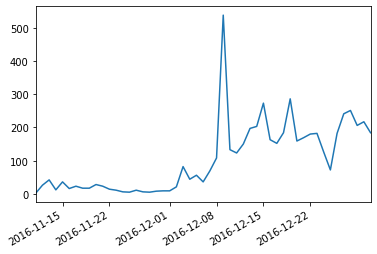

In [12]:
%matplotlib inline

df['date'].value_counts().plot()

You can also count frequency including retweets by constructing a new variable that is the number of retweets plus one (the original tweet). This shows a slightly different trend, with several new peaks.

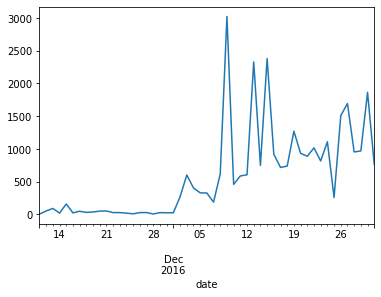

In [13]:
df['tweet_counts'] = df['retweets_count'] + 1

df.groupby(df["date"]).sum()["tweet_counts"].plot()

### Twint Exercise 2

Let's use the same set of tools to look at the tweet and retweet frequencies associated with the #womensmarch in 2018, over a smaller period of time. Use `Since` and `Until` to set the date parameters so that we're scraping tweets from the period between January 18th, 2018 to January 22nd, 2018. What's the day with the highest tweet frequency? Is there anything different going on with the retweet frequency? How do the frequencies we with the 2018 #womensmarch compare to the frequencies we saw for the #womensmarch from 2016 to 2017? (Hint: Don't forget to hide the tweet scroll and store the file in JSON format.)

<details>
<summary>Sample answer code</summary> 
<code style="background-color: white">
c = twint.Config()

c.Search = '#womensmarch'

c.Since = '2018-01-18'
c.Until = '2018-01-22'


c.Hide_output = True

c.Store_json = True
c.Output = 'womensmarch_2018.json'
    
df1 = pd.read_json('womensmarch_2018.json' , lines = True)

df1.info()
    
%matplotlib inline

df1['date'].value_counts().plot()
    
df1['tweet_counts'] = df1['retweets_count'] + 1

df1.groupby(df1["date"]).sum()["tweet_counts"].plot()
</code>
</details>

In [73]:
import pandas as pd
c = twint.Config()

c.Search = '#womensmarch'

c.Since = '2018-01-18'
c.Until = '2017-01-22'


c.Hide_output = True

c.Store_json = True
c.Output = 'womensmarch_2018.json'

In [74]:
twint.run.Search(c)

In [75]:
df1 = pd.read_json('womensmarch_2018.json' , lines = True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125584 entries, 0 to 125583
Data columns (total 34 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               125584 non-null  int64         
 1   conversation_id  125584 non-null  int64         
 2   created_at       125584 non-null  datetime64[ns]
 3   date             125584 non-null  datetime64[ns]
 4   time             125584 non-null  object        
 5   timezone         125584 non-null  object        
 6   user_id          125584 non-null  int64         
 7   username         125584 non-null  object        
 8   name             125584 non-null  object        
 9   place            125584 non-null  object        
 10  tweet            125584 non-null  object        
 11  mentions         125584 non-null  object        
 12  urls             125584 non-null  object        
 13  photos           125584 non-null  object        
 14  replies_count    125

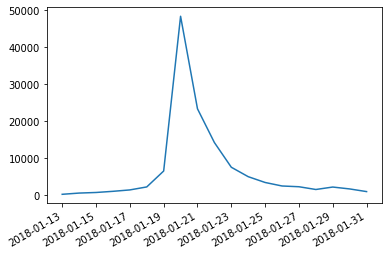

In [76]:
%matplotlib inline

df1['date'].value_counts().plot()

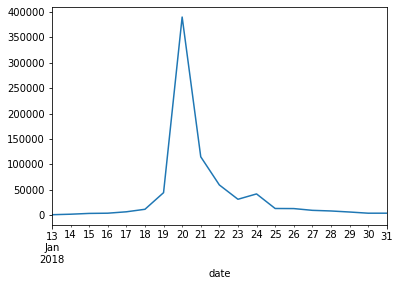

In [77]:
df1['tweet_counts'] = df1['retweets_count'] + 1

df1.groupby(df1["date"]).sum()["tweet_counts"].plot()

## Visulaizing Tweets

You can take advantage of the fact that the tweet meta data provides a link to the original tweet and that Python can display HTML to visualize the tweets in your notebook. First, a small function to get and display the tweet based on the link url.

In [14]:
from IPython.display import HTML
import requests

def show_tweet(link):
    '''Display the contents of a tweet. '''
    url = 'https://publish.twitter.com/oembed?url=%s' % link
    response = requests.get(url)
    html = response.json()["html"]
    display(HTML(html))


The function can be tested on a sample link.

In [20]:
sample_tweet_link = df.sample(1)['link'].values[0]
display(sample_tweet_link)
show_tweet(sample_tweet_link)

'https://twitter.com/EndHateRadio/status/800472193943552000'

The top few can be displayed using a loop, with 🔥 as a seperator.

In [21]:
# A list of the tweet urls, sorted by retweet count.
rt_links = df.sort_values(by= 'retweets_count', ascending = False)['link'].values

for url in rt_links[:5]:
    print('🔥 ' * 19)
    show_tweet(url)

🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 🔥 


### Twint Exercise 3

Let's display 5 tweets from the 2018 #womensmarch dataframe we created in the last exercise. This time, we'll sort by `likes_count` rather than `retweets_count`. Feel free to continue using 🔥 as a seperator, or [search](https://emojipedia.org/) for a seperator of your choice. 

In [43]:
rt_links1 = df1.sort_values(by= 'likes_count', ascending = False)['link'].values

for url in rt_links1[:5]:
    print('✨ ' * 19)
    show_tweet(url)

✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ 


✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ 


✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ 


✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ 


✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ ✨ 


### Production

If you are collecting a large number of tweets, something is likely to go wrong along the way. Two options can help minimize the damage. 

First, the `Resume` option allows you to store the ID of the most recent tweet that was collected. If your search gets interrupted,  you can run `twint.run.Search(c)` a second time, and the search will resume where it left off. This option is particularly useful if you lose internet access.  

Second, the `Debug` option allows you a behind-the-scenes look at what your Twitter scraper is doing. It creates two files in your current working directory. `twint-request_urls.log` lists the URL for each of the requests being made. If the results are not what you expected, you can copy and paste a URL into your browser window to manual inspect the results. `twint-last-request.log` contains what was returned by the most recent URL. 

In [25]:
c = twint.Config()

c.Search = '#womensmarch'
c.Since = '2017-01-01'
c.Until = '2017-01-02'
c.Hide_output = True
c.Store_json = True
c.Output = 'womensmarch_2017.json'
c.Resume = 'wm_last.csv'
c.Debug = True



In [26]:
twint.run.Search(c)

If the resulting json or other file is likley to be massive, you can split your search by date and create seperate files for each date. This also has the advantage that if something goes wrong, you can focus on a specific date.

The cell below creates several functions to automate the process of searching over several days and storing each day's results as distinct json file: `twint_loop` splits the date range into a series of days and calls `twint_search` to do the searching for each date. Each json is named after the date and stored in a directory based on the search term, using `clean_name` to ensure that it is a valide directory name. The date loop

In [19]:
from datetime import timedelta
from string import ascii_letters, digits
from os import mkdir, path

def clean_name(dirname):
    valid = set(ascii_letters + digits)
    return ''.join(a for a in dirname if a in valid)


def twint_search(searchterm, since, until, json_name):
    '''
    Twint search for a specific date range.
    Stores results to json.
    '''
    c = twint.Config()
    c.Search = searchterm
    c.Since = since
    c.Until = until
    c.Hide_output = True
    c.Store_json = True
    c.Output = json_name
    c.Debug = True
    
    try:
        twint.run.Search(c)    
    except (KeyboardInterrupt, SystemExit):
        raise
    except:
        print("Problem with %s." % since)
    



def twint_loop(searchterm, since, until):
    
    dirname = clean_name(searchterm)
    try:
    # Create target Directory
        mkdir(dirname)
        print("Directory" , dirname ,  "Created ") 
    except FileExistsError:
        print("Directory" , dirname ,  "already exists")

    daterange = pd.date_range(since, until)
    
    for start_date in daterange:

        since= start_date.strftime("%Y-%m-%d")
        until = (start_date + timedelta(days=1)).strftime("%Y-%m-%d")

        json_name = '%s.json' % since
        json_name = path.join(dirname, json_name)
        
        print('Getting %s ' % since )
        twint_search(searchterm, since, until, json_name)
        
        


twint_loop('#womensmarch', '01-01-2018', '01-08-2018')


Directory womensmarch already exists
Getting 2018-01-01 


CRITICAL:root:twint.output:checkData:copyrightedTweet


Getting 2018-01-02 
Getting 2018-01-03 
Getting 2018-01-04 
Getting 2018-01-05 
Getting 2018-01-06 
Getting 2018-01-07 
Getting 2018-01-08 


List the contents of the new directory confirms that it worked.

In [31]:
from glob import glob

glob(path.join('womensmarch','*.json'))

['womensmarch/2018-01-08.json',
 'womensmarch/2018-01-04.json',
 'womensmarch/2018-01-05.json',
 'womensmarch/2018-01-02.json',
 'womensmarch/2018-01-03.json',
 'womensmarch/2018-01-01.json',
 'womensmarch/2018-01-06.json',
 'womensmarch/2018-01-07.json']

Finally, the separate data files can be combined into a single dataframe.

In [38]:
file_names = glob(path.join('womensmarch','*.json'))
dfs = [pd.read_json(fn, lines = True) for fn in file_names]
wm2018_df = pd.concat(dfs)

wm2018_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1482 entries, 0 to 133
Data columns (total 34 columns):
id                 1482 non-null int64
conversation_id    1482 non-null int64
created_at         1482 non-null datetime64[ns]
date               1482 non-null datetime64[ns]
time               1482 non-null object
timezone           1482 non-null object
user_id            1482 non-null int64
username           1482 non-null object
name               1482 non-null object
place              1482 non-null object
tweet              1482 non-null object
mentions           1482 non-null object
urls               1482 non-null object
photos             1482 non-null object
replies_count      1482 non-null int64
retweets_count     1482 non-null int64
likes_count        1482 non-null int64
hashtags           1482 non-null object
cashtags           1482 non-null object
link               1482 non-null object
retweet            1482 non-null bool
quote_url          1482 non-null object
video 

Twint has many more capabilities, such as the ability to search a user's timeline, friends or followers, and has additional search options, such as other search or storing options, but hopefully this notebook has provided an introduction to some of its capabilities.